In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
google_data=pd.read_csv("C:\\Users\\Asus\\Downloads\\google_5yr_one.csv")

In [3]:
google_data.head()

,Date,Close,High,Low,Open,Volume
0,NaN,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,2020-06-04,70.3785171508789,71.72309429138843,69.96599205492319,71.4971694316438,26982000
2,2020-06-05,71.65840148925781,71.9709103787135,70.0461071028752,70.44520002096422,42642000
3,2020-06-08,72.05748748779297,72.10525562528537,70.88509140875318,70.974667107052,33878000
4,2020-06-09,72.25852966308594,73.04079279119881,71.77484210279437,71.91816171630913,33624000


## Data Cleaning and Preprocessing

The initial inspection shows that the numeric columns such as Close, High, Low, Open, and Volume are stored as strings. Similarly, the Date column must be interpreted as a date type. We will convert these columns accordingly, handle any conversion errors gracefully, and drop rows with missing values if necessary.


### Checking Missing  Values

In [3]:
google_data.isnull().sum()

Date      1
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

There is only one missing values in Date Column. So we can drop this row

### Remove Missing values

In [3]:
google_data.dropna(subset=['Date'],inplace=True)

In [5]:
google_data


,Date,Close,High,Low,Open,Volume
1,2020-06-04,70.3785171508789,71.72309429138843,69.96599205492319,71.4971694316438,26982000
2,2020-06-05,71.65840148925781,71.9709103787135,70.0461071028752,70.44520002096422,42642000
3,2020-06-08,72.05748748779297,72.10525562528537,70.88509140875318,70.974667107052,33878000
4,2020-06-09,72.25852966308594,73.04079279119881,71.77484210279437,71.91816171630913,33624000
5,2020-06-10,72.88652801513672,73.28810385800969,72.37198974644225,72.72778683921254,31762000
...,...,...,...,...,...,...
1251,2025-05-27,172.89999389648438,173.1699981689453,170.0,170.16000366210938,37995700
1252,2025-05-28,172.36000061035156,175.27000427246094,171.91000366210938,173.16000366210938,34784000
1253,2025-05-29,171.86000061035156,174.4199981689453,170.6300048828125,174.0,29373800
1254,2025-05-30,171.74000549316406,172.2100067138672,167.44000244140625,171.35000610351562,52639900


In [6]:
google_data.describe()

,Date,Close,High,Low,Open,Volume
count,1255,1255,1255,1255,1255,1255
unique,1255,1237,1255,1255,1255,1249
top,2020-06-04,105.46577453613281,71.72309429138843,69.96599205492319,71.4971694316438,22288000
freq,1,3,1,1,1,3


###  Convert 'Date' column to datetime format

In [4]:
google_data['Date'] = pd.to_datetime(google_data['Date'], errors='coerce')

In [6]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 1 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1255 non-null   datetime64[ns]
 1   Close   1255 non-null   object        
 2   High    1255 non-null   object        
 3   Low     1255 non-null   object        
 4   Open    1255 non-null   object        
 5   Volume  1255 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 68.6+ KB


### Convert Numeric columns to Numeric format from string format

In [5]:
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
google_data[numeric_cols] = google_data[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [6]:
google_data.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

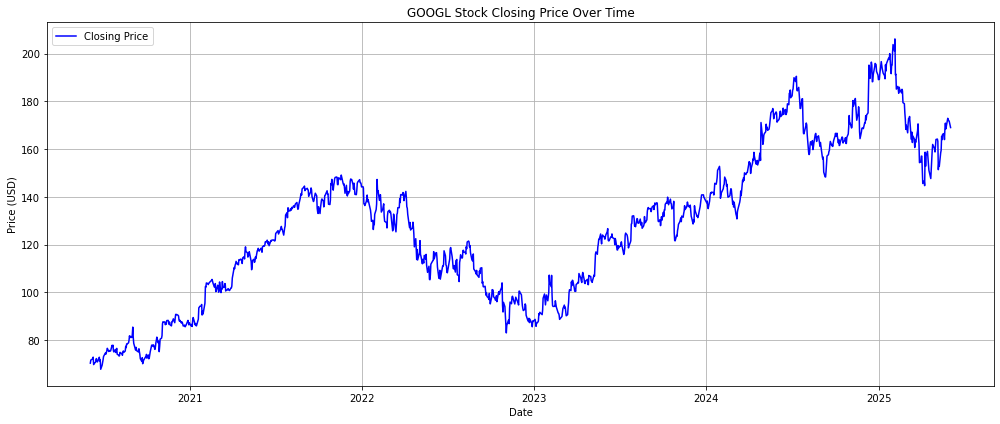

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(google_data['Date'].to_numpy(),google_data['Close'].to_numpy(), label='Closing Price', color='blue')
plt.title('GOOGL Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

An upward trend in the closing price generally suggests positive investor sentiment or strong company performance, while a downward trend may indicate market concerns or weakening fundamentals.

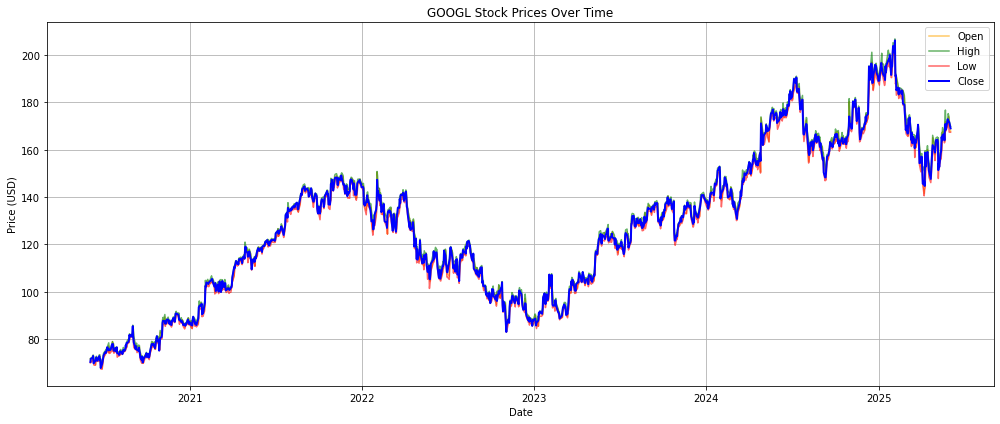

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(google_data['Date'].to_numpy(), google_data['Open'].to_numpy(), label='Open', color='orange', alpha=0.6)
plt.plot(google_data['Date'].to_numpy(), google_data['High'].to_numpy(), label='High', color='green', alpha=0.6)
plt.plot(google_data['Date'].to_numpy(), google_data['Low'].to_numpy(), label='Low', color='red', alpha=0.6)
plt.plot(google_data['Date'].to_numpy(), google_data['Close'].to_numpy(), label='Close', color='blue', linewidth=2)
plt.title('GOOGL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


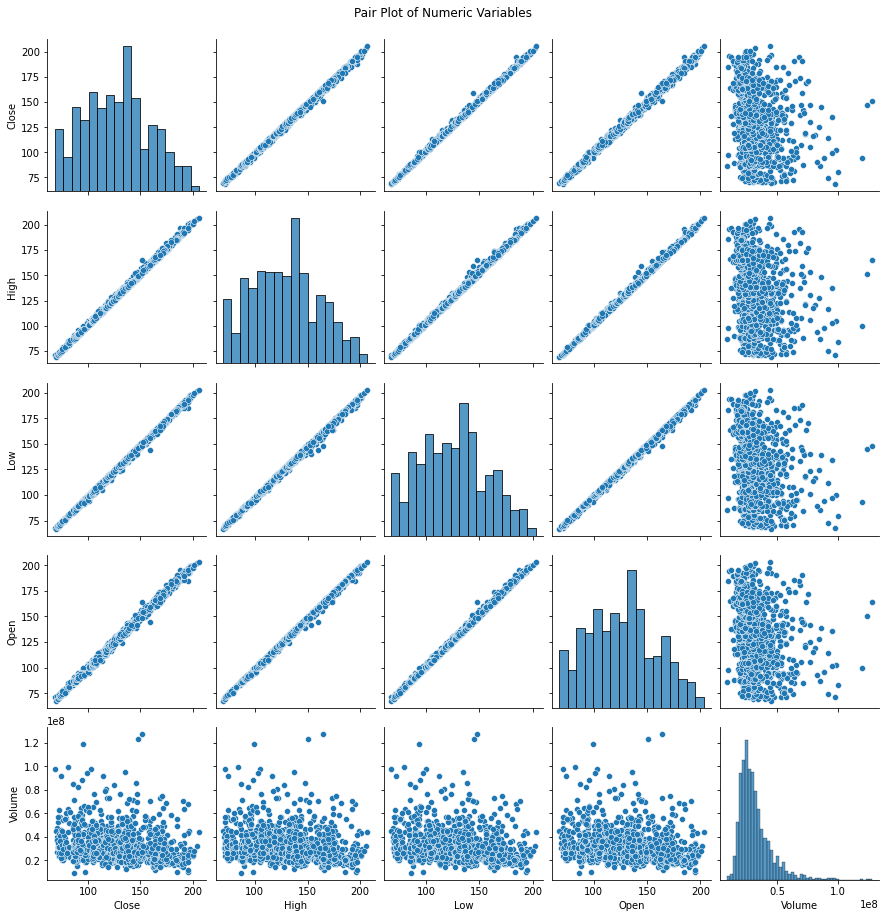

In [20]:
sns.pairplot(google_data[numeric_cols])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()


In [21]:
corr=google_data[numeric_cols].corr()

In [23]:
corr

,Close,High,Low,Open,Volume
Close,1.000000,0.999115,0.999268,0.998086,-0.184416
High,0.999115,1.000000,0.999001,0.999162,-0.167375
Low,0.999268,0.999001,1.000000,0.999080,-0.194625
Open,0.998086,0.999162,0.999080,1.000000,-0.178407
Volume,-0.184416,-0.167375,-0.194625,-0.178407,1.000000


The correlation matrix reveals a very strong positive correlation (close to 1.0) between the Close, High, Low, and Open prices — all ranging between 0.998 and 1.000. This high degree of linear relationship is expected in stock price data, where daily opening, closing, and intraday highs/lows are naturally interdependent. It implies that price movements throughout the day are tightly connected, reinforcing that any of these price points can reliably indicate overall market direction.


In contrast, the Volume column shows a moderate negative correlation with the price-related columns: about -0.18 to -0.19. This suggests that as prices rise, volume tends to decrease slightly, or vice versa. This inverse relationship might indicate that price increases are not always driven by high trading activity, and could reflect reduced volatility or less speculative interest during those times. However, since the negative correlation is weak, it's not a dominant factor but still worth monitoring — especially in identifying low-volume rallies or high-volume sell-offs.In fact, whenever prices go up, volume sometimes goes down a bit. It's like everyone is quietly watching the price climb without rushing to buy or sell. So, while prices are dancing together, volume is slightly stepping away — just enough for us to notice.

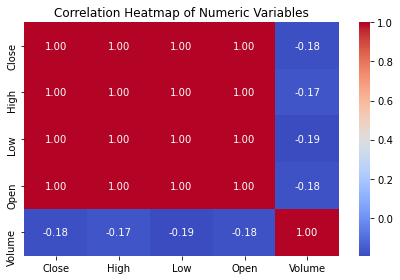

In [24]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

## Trend Analysis

In [7]:
google_data['Daily_Return'] = google_data['Close'].pct_change()


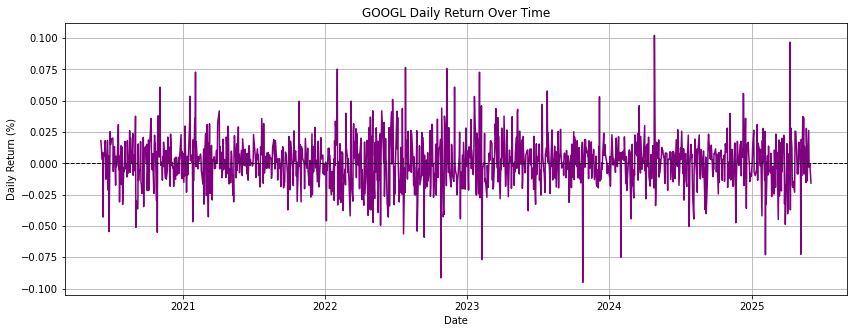

In [35]:
plt.figure(figsize=(14, 5))
plt.plot(google_data['Date'].to_numpy(), google_data['Daily_Return'].to_numpy(), label='Daily Return', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('GOOGL Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.show()


In [24]:
google_data

,Date,Close,High,Low,Open,Volume,Daily_Return
1,2020-06-04,70.378517,71.723094,69.965992,71.497169,26982000,NaN
2,2020-06-05,71.658401,71.970910,70.046107,70.445200,42642000,0.018186
3,2020-06-08,72.057487,72.105256,70.885091,70.974667,33878000,0.005569
4,2020-06-09,72.258530,73.040793,71.774842,71.918162,33624000,0.002790
5,2020-06-10,72.886528,73.288104,72.371990,72.727787,31762000,0.008691
...,...,...,...,...,...,...,...
1251,2025-05-27,172.899994,173.169998,170.000000,170.160004,37995700,0.026295
1252,2025-05-28,172.360001,175.270004,171.910004,173.160004,34784000,-0.003123
1253,2025-05-29,171.860001,174.419998,170.630005,174.000000,29373800,-0.002901
1254,2025-05-30,171.740005,172.210007,167.440002,171.350006,52639900,-0.000698


- Positive returns = growth

  Negative returns = decline

### 📊 Moving Averages (Short vs Long Term):

In [8]:
google_data['MA20'] = google_data['Close'].rolling(window=20).mean()
google_data['MA50'] = google_data['Close'].rolling(window=50).mean()


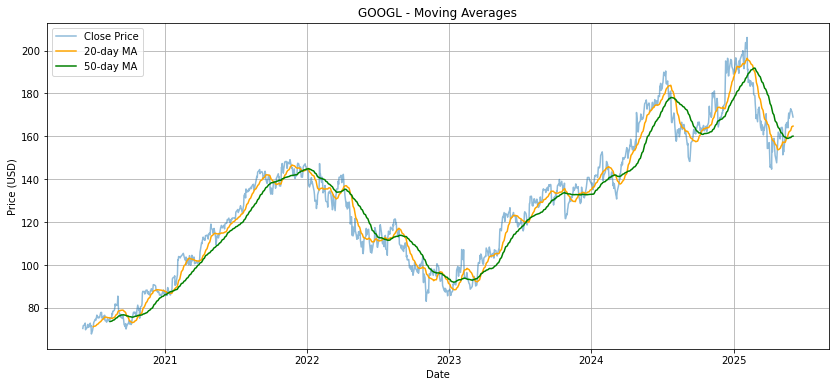

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(google_data['Date'].to_numpy(), google_data['Close'].to_numpy(), label='Close Price', alpha=0.5)
plt.plot(google_data['Date'].to_numpy(), google_data['MA20'].to_numpy(), label='20-day MA', color='orange')
plt.plot(google_data['Date'].to_numpy(), google_data['MA50'].to_numpy(), label='50-day MA', color='green')
plt.title('GOOGL - Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

- If MA20 > MA50 → upward trend (bullish)

- If MA20 < MA50 → downward trend (bearish)

By calculating moving averages, such as 20-day and 50-day averages, we find that the shorter-term average often crosses above the longer-term one, indicating bullish momentum during those intervals. These moving averages smooth out daily volatility and reveal the underlying growth trajectory of the stock.

### Volatility:

In [26]:
volatility = google_data['Daily_Return'].std()


In [27]:
volatility

0.019621018385039657

The calculated volatility of the stock is approximately **1.96%**, which represents the standard deviation of its daily returns over the analysis period. This means that, on average, the stock’s daily price movements deviate from the mean return by about **1.96%**. In practical terms, the stock experiences moderate volatility, indicating a balance between risk and stability. It’s not as stable as a utility stock (**typically <1%**) nor as volatile as speculative tech or crypto assets (**often >3%**). This level of volatility is considered acceptable for long-term investors, especially if the stock shows strong growth trends, as it suggests predictable movement with manageable risk exposure.

### Group data by Time period

In [9]:
google_data['Month'] = google_data['Date'].dt.to_period('M')
monthly_avg = google_data.groupby('Month')['Close'].mean()


In [37]:
monthly_avg

Month
2020-06     71.182494
2020-07     75.405379
2020-08     76.883403
2020-09     75.215517
2020-10     76.729207
              ...    
2025-02    184.108490
2025-03    165.313997
2025-04    154.558097
2025-05    164.379524
2025-06    169.029999
Freq: M, Name: Close, Length: 61, dtype: float64

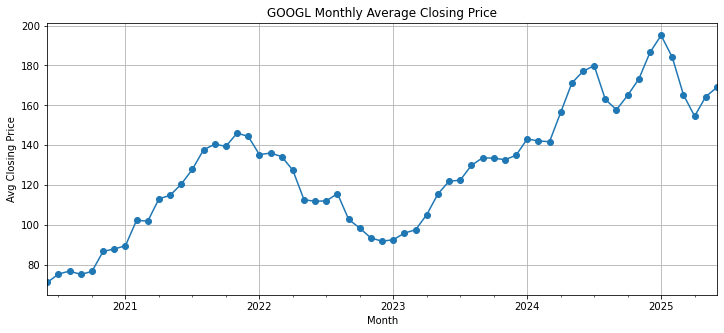

In [36]:
monthly_avg.plot(kind='line', figsize=(12, 5), marker='o')
plt.title('GOOGL Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Avg Closing Price')
plt.grid(True)
plt.show()

When grouping the data by month, we see that monthly average closing prices tend to increase gradually, suggesting long-term growth. However, there are months with flat or negative performance, indicating short-term corrections within the broader uptrend.

From June 2020 to June 2025, the average monthly closing price of the stock shows a clear long-term upward trend, despite some fluctuations. Beginning at around \\$71.18 in June 2020, the stock steadily increased over the next few months, reaching a peak of \\$76.88 in August 2020, which reflects a strong early post-pandemic recovery phase in the market. Although there were minor dips, such as in September 2020 (\\$75.22) and March 2025 (\\$165.31), the overall movement demonstrates growth.

Throughout the period, the stock experienced consistent bullish phases, especially noticeable in the late 2022 to early 2025 period. By February 2025, the stock reached a high average close of \\$184.11, showing a substantial increase from the 2020 baseline. This represents a total growth of approximately \\137% over 5 years. However, after peaking in early 2025, there was a slight decline in March and April, possibly due to market correction or external economic factors, followed by a modest recovery to $169.03 by June 2025.

These trends suggest strong long-term investor confidence, with occasional corrections offering potential entry points for new investors. The consistent upward movement in average monthly closing prices, despite short-term volatility, aligns with typical behavior of stable growth stocks. If the underlying fundamentals and market conditions remain favorable, continued upward movement could be expected.



### Compare High vs Low Values


In [10]:
google_data['Range'] = google_data['High'] - google_data['Low']



### Volume Analysis

In [11]:
avg_volume = google_data['Volume'].mean()
google_data['HighVolume'] = google_data['Volume'] > avg_volume


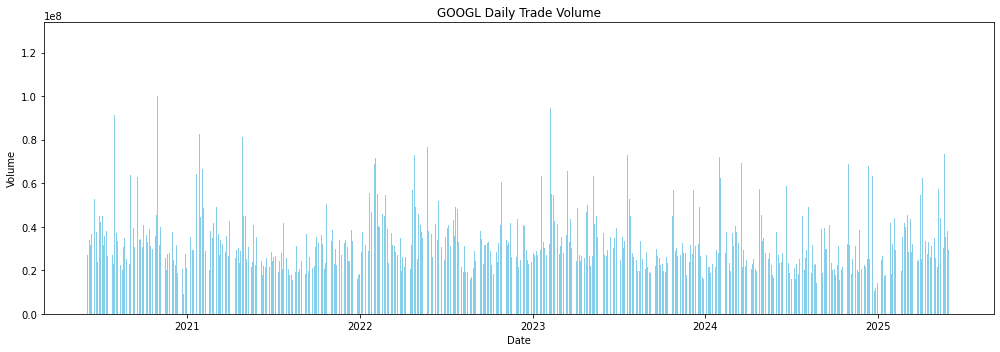

In [38]:
plt.figure(figsize=(14, 5))
plt.bar(google_data['Date'].to_numpy(), google_data['Volume'].to_numpy(), color='skyblue')
plt.title('GOOGL Daily Trade Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


The calculated daily return reveals that the stock generally experiences small but stable price fluctuations, with occasional larger movements like a **2.6% gain on May 27, 2025**, suggesting strong bullish sentiment on those days. The moving averages — MA20 (short-term) and MA50 (mid-term) — help identify overall momentum. For instance, in late May 2025, MA20 exceeded MA50, indicating a potential short-term uptrend or bullish crossover

The Range column, which reflects the difference between daily highs and lows, highlights market volatility, with higher values (e.g., 4.77 on May 30, 2025) suggesting intraday uncertainty or news-driven trading. Meanwhile, the HighVolume flag is useful for identifying days of unusually active trading, which often aligns with price reversals, breakouts, or institutional activity. Notably, many days with large returns or wider ranges are also marked as HighVolume=True, confirming volume supports price action.



In [14]:
google_data.to_csv('googledata.csv', index=False)


In [17]:
google_data.groupby(['Month'])['Close'].sum()

Month
2020-06    1352.467392
2020-07    1658.918343
2020-08    1614.551453
2020-09    1579.525856
2020-10    1688.042549
              ...     
2025-02    3498.061310
2025-03    3471.593933
2025-04    3245.720047
2025-05    3451.970001
2025-06     169.029999
Freq: M, Name: Close, Length: 61, dtype: float64

## Stock Price Predictor

 The objective here is to predict the closing stock price using the other available features. 
 
1. The Holt-Winters method looks at:

- The overall trend: Is the price generally going up or down?

- Seasonality: Are there repeating patterns, like weekly or monthly rises?

- Level: What's the average behavior?
Holt-Winters can make a smooth prediction for the next few days or months. It’s great for data that has clear trends and seasonality, like retail sales or electricity usage — 

2.  it also learns how today's price depends on yesterday’s, and even on how fast prices have been changing recently. That’s ARIMA — short for AutoRegressive Integrated Moving Average.

ARIMA asks:

- “Is the price based on past values?” (AutoRegressive)

- “Are the values already steady or do I need to ‘smooth’ them?” (Integrated)

- “How much of the random ups and downs can I model?” (Moving Average)

This model is especially useful when your data doesn’t repeat in cycles but still has some structure — like a steadily rising tech stock.



In [25]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [13]:
google_data.set_index('Date', inplace=True)


### Fit the ARIMA Model

if  we give (5,1,2) to the ARIMA parameters:

p=5: lag observations (Auto-Regressive).
- Autoregressive (AR)	Uses past values to predict future ones (lags of the dependent variable).It captures the relationship between current and past values.Here uses 5 past values to predict current value

d=1: number of differences to make the series stationary or Refers to the number of times the data is differenced to make it stationary.Makes the time series stationary. Here the model uses the difference between current and previous values

q=2: size of the moving average window. Uses past forecast errors in a regression-like model.Models the relationship between error terms from past time steps.Here it uses error from past 2 time steps to predict current



### Find ARIMA Parameters

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_diff)  # use your column
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -19.793970992061
p-value: 0.0


if p-value<0.05 , series is now stationary,
else repeat differencing again

In [19]:
data_diff = google_data['Close'].diff().dropna()

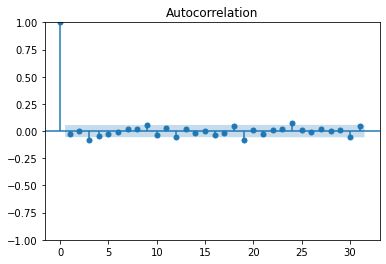

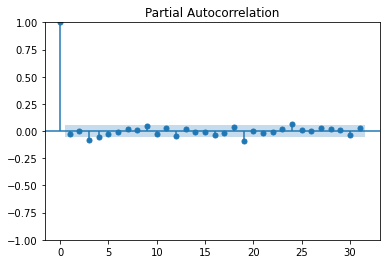

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(data_diff.dropna())   # for MA(q)
plot_pacf(data_diff.dropna())  # for AR(p)
plt.show()


In [22]:
from statsmodels.tsa.arima.model import ARIMA

for p in range(0, 5):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                model = ARIMA(google_data['Close'], order=(p,d,q))
                model_fit = model.fit()
                print(f'ARIMA({p},{d},{q}) AIC={model_fit.aic}')
            except:
                continue


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0,0,0) AIC=12231.161853164416


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0,0,1) AIC=10635.419587767497


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0,0,2) AIC=9430.154156669041
ARIMA(0,1,0) AIC=5883.904867110468
ARIMA(0,1,1) AIC=5884.963844660084
ARIMA(0,1,2) AIC=5886.951873001015


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

ARIMA(1,0,0) AIC=5896.923495486437


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,0,1) AIC=5898.08192564107


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,0,2) AIC=5900.079638801428
ARIMA(1,1,0) AIC=5884.965899357514


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

ARIMA(1,1,1) AIC=5886.219526659085
ARIMA(1,1,2) AIC=5884.40664944381


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

ARIMA(2,0,0) AIC=5898.081283070763


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,0,1) AIC=5899.306958894158


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,0,2) AIC=5897.9735654650085
ARIMA(2,1,0) AIC=5886.96531670645


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

ARIMA(2,1,1) AIC=5888.965707583149


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,2) AIC=5886.305897155386


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3,0,0) AIC=5900.075838890833


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3,0,1) AIC=5901.249299381287


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsm

ARIMA(3,0,2) AIC=5895.649718271269
ARIMA(3,1,0) AIC=5881.5347844972275
ARIMA(3,1,1) AIC=5879.869145707678


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3,1,2) AIC=5880.277397398348


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4,0,0) AIC=5894.893493104899


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4,0,1) AIC=5893.446405669547


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsm

ARIMA(4,0,2) AIC=5898.544566117545
ARIMA(4,1,0) AIC=5880.42163746278


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4,1,1) AIC=5881.524989676981


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4,1,2) AIC=5881.156073534097


AIC (Akaike Information Criterion) , choose the one that best fits the data — without overfitting.
ARIMA(3,1,1) has the lowest AIC = 5879.87. Lower AIC = Better model (in terms of fit + simplicity).so we use 3,1,1 as parameter

In [23]:
# Fit the model
model = ARIMA(google_data['Close'], order=(3, 1, 1))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base

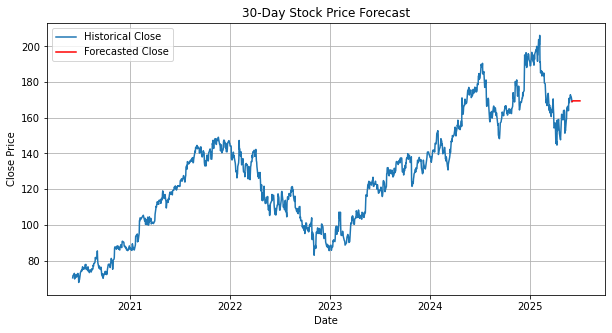

In [28]:
# Plot the original data and forecast
plt.figure(figsize=(10, 5))
plt.plot(google_data['Close'], label='Historical Close')
forecast_index = pd.date_range(google_data.index[-1], periods=30, freq='D')
plt.plot(forecast_index.to_numpy(), forecast.to_numpy(), label='Forecasted Close', color='red')
plt.title('30-Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Create forecast dates starting from the last known date
forecast_index = pd.date_range(start=google_data.index[-1] + pd.Timedelta(days=1), periods=30)

# Combine into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Predicted_Close': forecast.values
})

print(forecast_df)


         Date  Predicted_Close
0  2025-06-03       169.094584
1  2025-06-04       169.102322
2  2025-06-05       169.329430
3  2025-06-06       169.428237
4  2025-06-07       169.475518
5  2025-06-08       169.479658
6  2025-06-09       169.473984
7  2025-06-10       169.467547
8  2025-06-11       169.464191
9  2025-06-12       169.463045
10 2025-06-13       169.463011
11 2025-06-14       169.463257
12 2025-06-15       169.463464
13 2025-06-16       169.463564
14 2025-06-17       169.463592
15 2025-06-18       169.463589
16 2025-06-19       169.463580
17 2025-06-20       169.463574
18 2025-06-21       169.463571
19 2025-06-22       169.463570
20 2025-06-23       169.463570
21 2025-06-24       169.463571
22 2025-06-25       169.463571
23 2025-06-26       169.463571
24 2025-06-27       169.463571
25 2025-06-28       169.463571
26 2025-06-29       169.463571
27 2025-06-30       169.463571
28 2025-07-01       169.463571
29 2025-07-02       169.463571


In [28]:
forecast_df.to_csv('forecastpredict.csv', index=False)

In [14]:
google_data['Year'] = google_data.index.year

In [15]:
google_data['month'] = google_data.index.month